<a href="https://colab.research.google.com/github/Ashwinkumar-J/Chennai-House-Price-Prediction/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

Data : https://drive.google.com/file/d/1hqlG0IqJh87-GiMNL_KAtbtZppMO07Hb/view?usp=sharing

**Minimum Requirements**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

#**Importing Data**

In [311]:
from google.colab import files
files.upload()

Saving train-chennai-sale.csv to train-chennai-sale (1).csv


{'train-chennai-sale.csv': b'PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE\r\nP03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4,3.9,4.9,4.33,380000,144400,7600000\r\nP09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770\r\nP01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200\r\nP05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr ,Paved,I,4.7,3.9,3.6,4.01,356321,77042,9630290\r\nP06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3,2.5,4.1,3.29,237000,74063,7406250\r\nP00219,Chrompet,1220,11-09-2014,36,2,1,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2

#**Importing Necessary Models**

In [312]:
#importing Necessary Modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn import preprocessing

#**Loading Data**

In [313]:
data = '/content/train-chennai-sale.csv'
df = pd.read_csv(data)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


#**Count and List of All Features**

In [314]:
print(df.columns)
print("The total number of features: ", df.shape[1])

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')
The total number of features:  22


#**Removing Unwanted Features**

In [315]:
df=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)
print("Total number of features in the data is:",df.shape[1])

Total number of features in the data is: 19


#**Checking for Data Types**

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

In [317]:
print("Total number of features in the data is:",df.shape[1])
pd.DataFrame(df.dtypes.value_counts()).T

Total number of features in the data is: 19


,object,float64,int64
0,9,6,4


#**Checking for Null and NA values in data**

In [318]:
df.isna().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

#**Replacing NA With Mode and Mean**

In [319]:
df=df.fillna({"N_BEDROOM":df["N_BEDROOM"].mode()[0],"N_BATHROOM":df["N_BATHROOM"].mode()[0],"QS_OVERALL":df["QS_OVERALL"].mean()})
df['N_BEDROOM'] = np.floor(df['N_BEDROOM'])
df['N_BATHROOM'] = np.floor(df['N_BATHROOM'])

**Outcome**

In [320]:
df.isna().sum() 

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

#**Cleaning Features**

#**1. "AREA"**

In [321]:
df["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

**Observing the above data, we can see that some data are mispelled, We must correct them and merge all these correctly**

In [322]:
df['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)

**Corrected data and Observations**

 **AREA – The property in which the real estate is located**

In [323]:
df["AREA"].value_counts() #Corrected Data

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

#**2. Converting Date features to their Correct Formats**

In [324]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

We can derive the **AgeWhenSold** and **Age_as_of_Today** of the Building by using the below formula

**Age When Sold = Sale year - Built year**

**Age As of Today = 2022 - Built year**

In [325]:
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year
df['SALE_YEAR'] = df['DATE_SALE'].dt.year
df["SOLD_AGE"]=df['SALE_YEAR']-df['BUILD_YEAR']
df["AGE_AS_OF_2022"] = 2022- df['BUILD_YEAR']
df[['BUILD_YEAR','SALE_YEAR',"SOLD_AGE","AGE_AS_OF_2022"]]

,BUILD_YEAR,SALE_YEAR,SOLD_AGE,AGE_AS_OF_2022
0,1967,2011,44,55
1,1995,2006,11,27
2,1992,2012,20,30
3,1988,2010,22,34
4,1979,2009,30,43
...,...,...,...,...
7104,1962,2011,49,60
7105,1995,2004,9,27
7106,1978,2006,28,44
7107,1977,2009,32,45


**Since the Date realted datas are extracted, we can now simply remove the date features.**

In [326]:
df.drop(['DATE_BUILD'],axis=1, inplace=True)
df.drop(['DATE_SALE'],axis=1, inplace=True)

**Corrected data format**


In [327]:
pd.DataFrame(df.dtypes.value_counts()).T

,int64,object,float64
0,8,7,6


#**3. BEDROOM**

**N_BEDROOM – The number of Bed rooms**

**Checking BEDROOM feature, we can observe that each house has max of 4 rooms**

In [328]:
df['N_BEDROOM'] = df['N_BEDROOM'].apply(np.int64)

In [329]:
df['N_BEDROOM'].value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

#**4. BATHROOM**

**N_BATHROOM - The number of bathrooms**

**Checking BATHROOM feature, we can observe that each house has max of 2 rooms**

In [330]:
df['N_BATHROOM'] = df['N_BATHROOM'].apply(np.int64)

In [331]:
df['N_BATHROOM'].value_counts() 

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

#**5. SALE CONDITION**

**Observing the Below data, we can find Spelling mistakes which needs to be corrected**

In [332]:
df['SALE_COND'].value_counts() 

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [333]:
df['SALE_COND'].replace(['Adj Land', 'Ab Normal','Partiall','PartiaLl'],
['AdjLand','AbNormal','Partial','Partial'],
inplace=True)

**Corrected Data**

**Seeing the below Data, we can understand the following :**

**SALE_COND – The Sale Condition**

**Normal: Normal Sale**


**Abnorml: Abnormal Sale - trade, foreclosure, short sale**


**AdjLand: Adjoining Land Purchase**


**Family: Sale between family members**


**Partial: Home was not completed when last assessed**

In [334]:
df['SALE_COND'].value_counts() 

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

#**PARKING FACILITY**

**PARK_FACIL – Whether parking facility is available or not**

**Observing the Below data, we can find Spelling mistakes which needs to be corrected**

In [335]:
df['PARK_FACIL'].value_counts()  

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [336]:
df['PARK_FACIL'].replace('Noo','No',inplace=True)

**Corrected Data**

In [337]:
df['PARK_FACIL'].value_counts()  

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

#**UTILITIES AVAILABLE**

**Observing the Below data, we can find Spelling mistakes which needs to be corrected**

In [338]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [339]:
df['UTILITY_AVAIL'].replace('All Pub','AllPub',inplace=True)

**Corrected Data**

**Seeing the below Data, we can understand the following :**

**AllPub: All public Utilities (E,G,W,& S)**


**NoSewr: Electricity, Gas, and Water (Septic Tank)**


**NoSeWa: Electricity and Gas Only**


**ELO: Electricity Line only**

In [340]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

#**STREET**

**Observing the Below data, we can find Spelling mistakes which needs to be corrected**

In [341]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [342]:
df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)

**Corrected Data**

In [343]:
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

#**BUILD TYPE**

**Observing the Below data, we can find Spelling mistakes which needs to be corrected**

In [344]:
df['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [345]:
df['BUILDTYPE'].replace(['Other','Comercial'],['Others','Commercial'],inplace=True)

**Corrected Data**

In [346]:
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

#**MZZONE**

**Seeing the below Data, we can understand the following :**

**A: Agriculture**


**C: Commercial**


**I: Industrial**


**RH: Residential High Density**


**RL: Residential Low Density**


**RM: Residential Medium Density**

In [347]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

#**Understanding All other Features**

**INT_SQFT – The interior Sq. Ft of the property**

**QS_ROOMS – The quality score assigned for rooms based on buyer reviews**

**QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews**

**QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews**

**QS_OVERALL – The Overall quality score assigned for the property**

**DIST_MAINROAD – The distance of the property to the main road**

**PRT_ID – The Property Transaction ID assigned by ChennaiEstate (Already Dropped)**

**COMMIS – The Commission paid to the agent (Already Dropped)**

**REG_FEE – The Registration Fees paid (Already Dropped)**

**SALES_PRICE – The total sale price (Target)**

#**DATA VIZUALISATION**

**Number of Houses Area Wise**

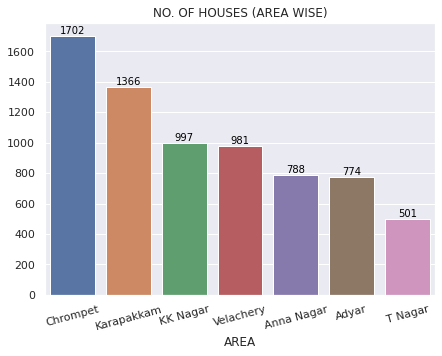

In [348]:
A=df['AREA'].groupby(df['AREA']).count().sort_values(ascending=False)
sns.set_theme(style="darkgrid",palette="deep")
chart=sns.barplot(x=A.index,y=A.values,data=df)
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.show()

In [349]:
print(A)

AREA
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64


**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**Area which has the most number of Houses  : CHROMPET** 

**Area which has the least number of Houses  : T.NAGAR**

**Number of Houses MZZONE Wise**

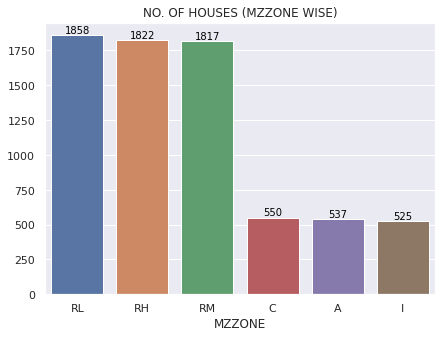

In [350]:
E=df['AREA'].groupby(df['MZZONE']).count().sort_values(ascending=False)
sns.set_theme(style="darkgrid",palette="deep")
chart=sns.barplot(x=E.index,y=E.values,data=df)
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
sns.set(rc={'figure.figsize':(7,5)})
plt.title('NO. OF HOUSES (MZZONE WISE)')
plt.show()

In [351]:
print(E)

MZZONE
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: AREA, dtype: int64


**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**ZONE which has the most number of Houses : RL**

**ZONE which has the least number of Houses : I**

**Number of Houses by BuildType**

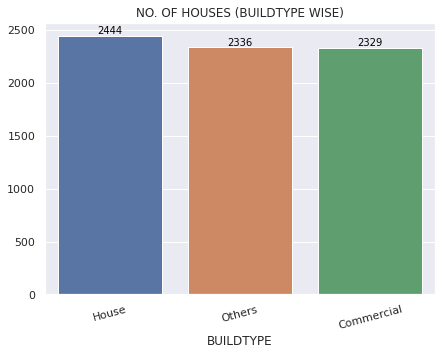

In [352]:
B=df['AREA'].groupby(df['BUILDTYPE']).count().sort_values(ascending=False)
sns.set_theme(style="darkgrid",palette="deep")
chart=sns.barplot(x=B.index,y=B.values,data=df)
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.show()

In [353]:
print(B)

BUILDTYPE
House         2444
Others        2336
Commercial    2329
Name: AREA, dtype: int64


**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**Type of Building which is mostly built in Chennai : House**

**Type of Building which is least in count : Commercial**

**Number of Houses Street Wise**

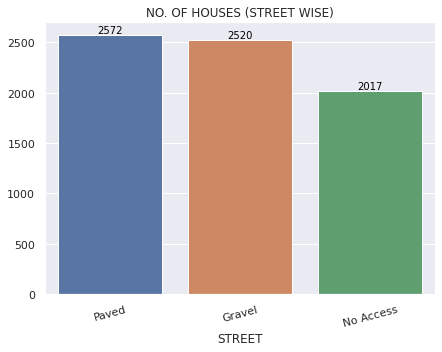

In [354]:
D=df['AREA'].groupby(df['STREET']).count().sort_values(ascending=False)
sns.set_theme(style="darkgrid",palette="deep")
chart=sns.barplot(x=D.index,y=D.values,data=df)
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.show()

In [355]:
print(D)

STREET
Paved        2572
Gravel       2520
No Access    2017
Name: AREA, dtype: int64


**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**The Infrastructure in Chennai is in its Midway and yet to be fully established. there are around 2017 houses which are yet to be connected to a Road.**

**Number of Houses having how many Bedrooms**

In [356]:
df['N_BEDROOM'].value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

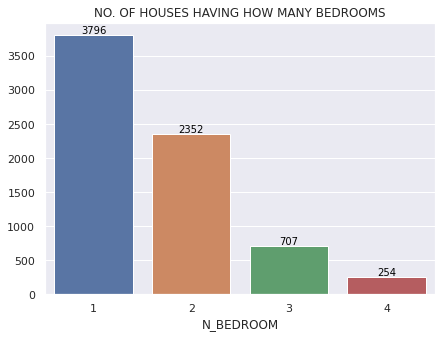

In [357]:
F=df['N_BEDROOM'].groupby(df['N_BEDROOM']).count().sort_values(ascending=False)
sns.set_theme(style="darkgrid",palette="deep")
chart=sns.barplot(x=F.index,y=F.values,data=df)
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
sns.set(rc={'figure.figsize':(7,5)})
plt.title('NO. OF HOUSES HAVING HOW MANY BEDROOMS')
plt.show()

**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**In Chennai the majority of the Houses are single bedroom houses.**

**There are 707 Houses having 3 Bedrooms and 254 houses having 4 Bedrooms, This shows that the number of Luxury houses in chennai are comparitively less in numbers.**

**Number of Houses having How many Bathrooms**

In [358]:
df['N_BATHROOM'].value_counts() 

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

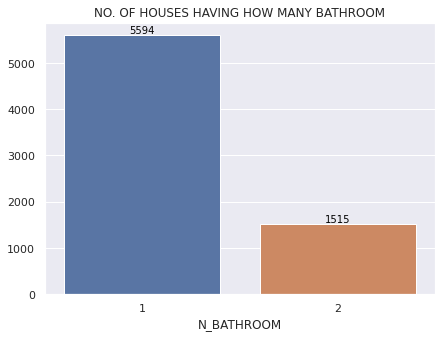

In [359]:
G=df['N_BATHROOM'].groupby(df['N_BATHROOM']).count().sort_values(ascending=False)
sns.set_theme(style="darkgrid",palette="deep")
chart=sns.barplot(x=G.index,y=G.values,data=df)
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
  sns.set(rc={'figure.figsize':(7,5)})
plt.title('NO. OF HOUSES HAVING HOW MANY BATHROOM')
plt.show()

**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**In Chennai, Majority of the Houses have Single bathrooms built.**
**We can conclude that consumers in Chennai region have preferred single Bathroom houses more than the double bathroom types.**

**Number of Houses With Parking Facility**

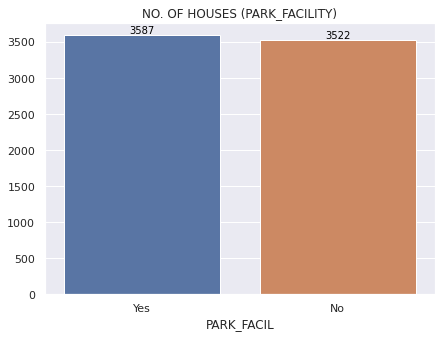

In [360]:
C=df['AREA'].groupby(df['PARK_FACIL']).count().sort_values(ascending=False)
sns.set_theme(style="darkgrid",palette="deep")
chart=sns.barplot(x=C.index,y=C.values,data=df)
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
sns.set(rc={'figure.figsize':(7,5)})
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()

In [361]:
print(C)

PARK_FACIL
Yes    3587
No     3522
Name: AREA, dtype: int64


**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**The Data communicates that there are almost equal number of houses in both classes. This would contribute more in terms of Sale Price.**

**Average Sales prices in Each Area**

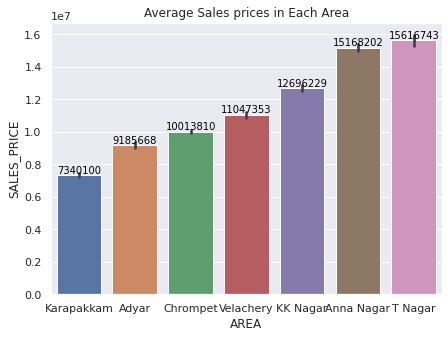

In [362]:
chart=sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.title('Average Sales prices in Each Area')
sns.set(rc={'figure.figsize':(10,8)})
plt.show()

**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**The Costliest area in Chennai : T.Nagar**

**The Cheapest area to purchase house in Chennai : Karapakkam**

**Average Sale Price for Each Built Type**

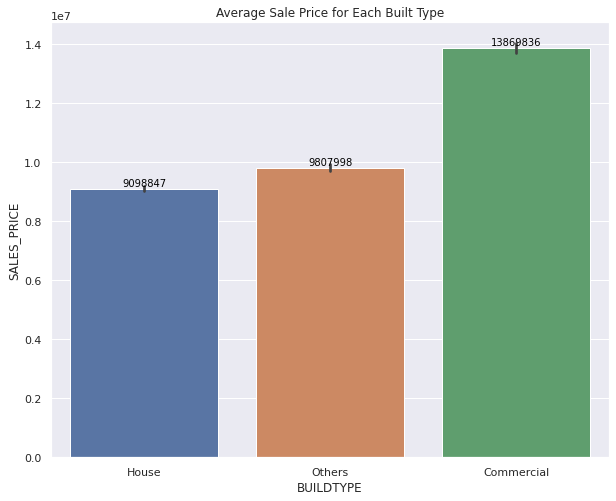

In [363]:
chart=sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.title('Average Sale Price for Each Built Type')
sns.set(rc={'figure.figsize':(7,5)})
plt.show()

**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**Observing the Above Plot, we can see that the Commercial houses in Chennai costs more than the other 2 type of houses, as they are more in size and Facilities.**

**Average Sale price for each Utility Type**

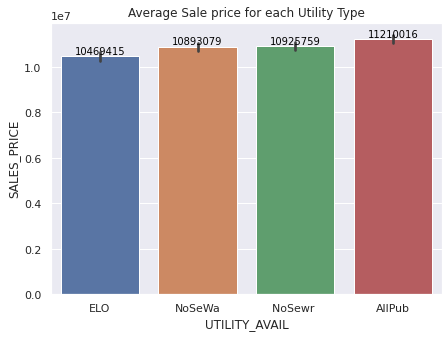

In [364]:
chart=sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.title('Average Sale price for each Utility Type')
sns.set(rc={'figure.figsize':(7,5)})
plt.show()

**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**The properties having all facitilies are having a mild Higher price than the other types of properties.**

**House size and their relation to House price According to Location**

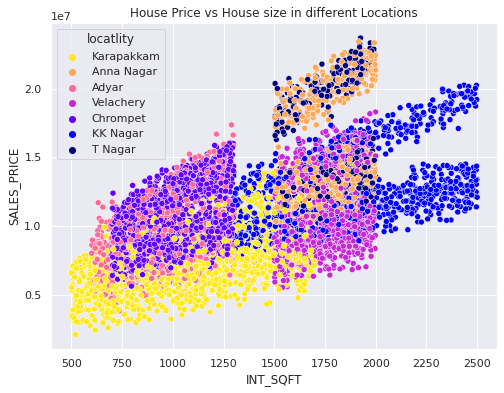

In [365]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="INT_SQFT", y='SALES_PRICE', hue='AREA', palette='gnuplot2_r')
plt.title("House Price vs House size in different Locations")
plt.legend(title='locatlity')
plt.show()

**FROM ABOVE CHART WE CAN INTREPRET THE FOLLOWING RESULTS:**

**We can observe that as the Square feet increases, the Sale Price also Increases in this plot.**

**The Location also contributes to the Sale price factor, Example, The T.nagar Locality has medium amount of Square feet size houses, but still prices the highest.**

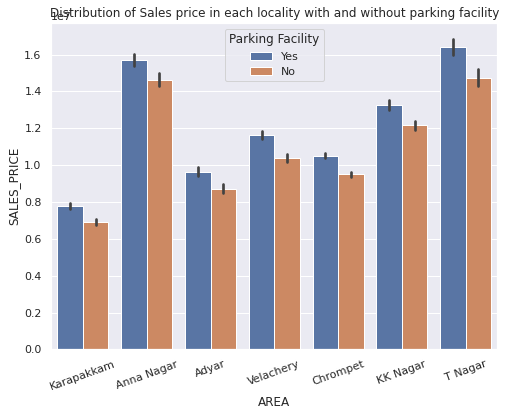

In [366]:
plt.figure(figsize=(8,6))
sns.barplot(x="AREA", y='SALES_PRICE', data=df, hue='PARK_FACIL')
sns.color_palette("Spectral", as_cmap=True)
plt.legend(title='Parking Facility')
plt.xticks(rotation=20)
plt.title("Distribution of Sales price in each locality with and without parking facility")
plt.show()

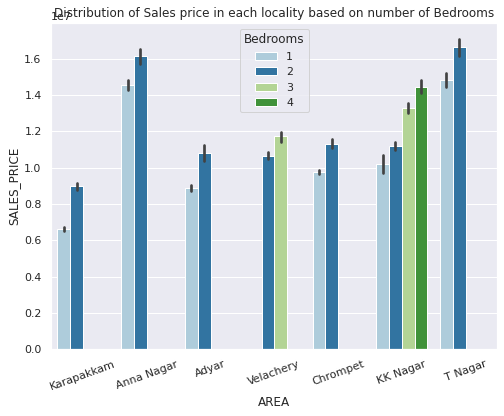

In [367]:
plt.figure(figsize=(8,6))
sns.barplot(x="AREA", y='SALES_PRICE', data=df, hue='N_BEDROOM', palette="Paired")
plt.legend(title='Bedrooms')
plt.xticks(rotation=20)
plt.title("Distribution of Sales price in each locality based on number of Bedrooms")
plt.show()

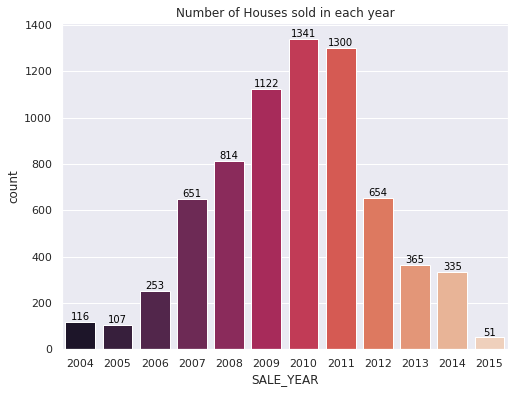

In [368]:
plt.figure(figsize=(8,6))
chart=sns.countplot(data=df, x='SALE_YEAR', palette='rocket')
for p in chart.patches:
  chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.title("Number of Houses sold in each year")
plt.show()

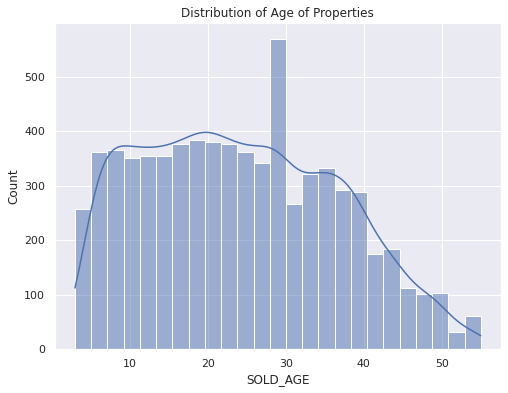

In [369]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="SOLD_AGE", kde=True)
plt.title("Distribution of Age of Properties")
plt.show()

**A Histogram on All the Available Features.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a69a76750>,
      dtype=object)

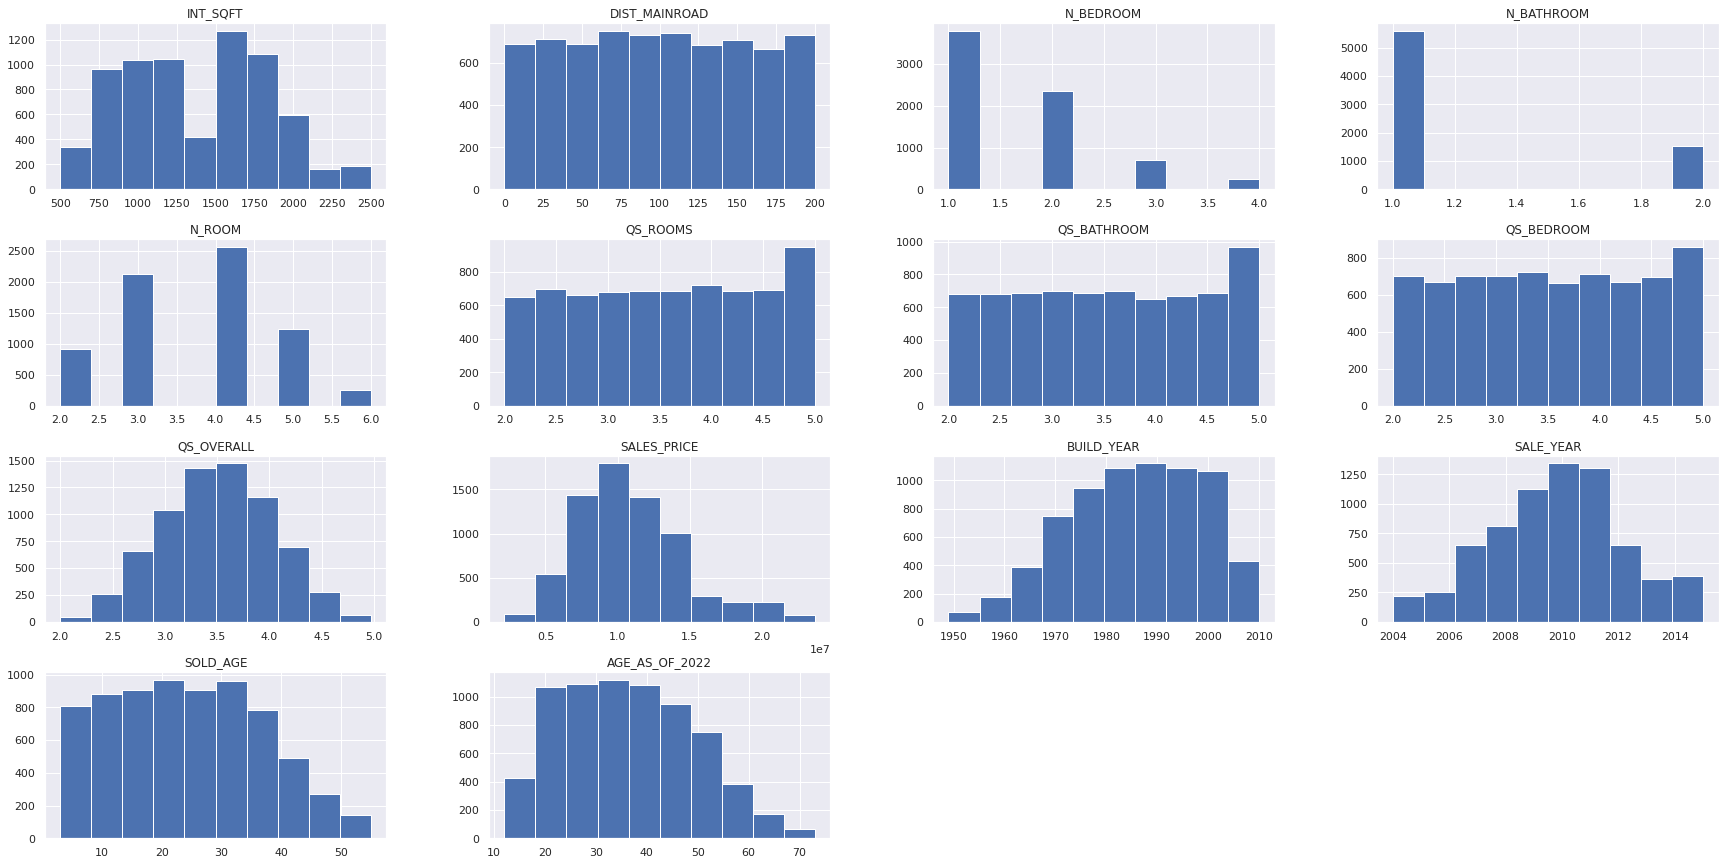

In [370]:
df.hist(bins=10,figsize=(30,15))

#**ENCODING FEATURES**

In [371]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE,AGE_AS_OF_2022
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,...,A,4.0,3.9,4.9,4.330,7600000,1967,2011,44,55
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,...,RH,4.9,4.2,2.5,3.765,21717770,1995,2006,11,27
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,...,RL,4.1,3.8,2.2,3.090,13159200,1992,2012,20,30
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,...,I,4.7,3.9,3.6,4.010,9630290,1988,2010,22,34
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,...,C,3.0,2.5,4.1,3.290,7406250,1979,2009,30,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,...,RM,3.0,2.2,2.4,2.520,5353000,1962,2011,49,60
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,...,RH,3.6,4.5,3.3,3.920,10818480,1995,2004,9,27
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,...,I,4.3,4.2,2.9,3.840,8351410,1978,2006,28,44
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,...,RL,4.6,3.8,4.1,4.160,8507000,1977,2009,32,45


In [372]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILD_YEAR', 'SALE_YEAR', 'SOLD_AGE',
       'AGE_AS_OF_2022'],
      dtype='object')

Here we have Features like AREA, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE to be Encoded.

**Encoding AREA**

In [373]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [374]:
df['AREA']=df['AREA'].map({'Karapakkam':1, 'Anna Nagar':2, 'Adyar':3, 'Velachery':4, 'Chrompet':5, 'KK Nagar':6, 'T Nagar':7})

In [375]:
df['AREA'] #Encoded results

0       1
1       2
2       3
3       4
4       1
       ..
7104    1
7105    4
7106    4
7107    1
7108    4
Name: AREA, Length: 7109, dtype: int64

**Encoding SALE_COND**

In [376]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [377]:
df['SALE_COND']=df['SALE_COND'].map({'AbNormal':1, 'Family':2, 'Partial':3, 'AdjLand':4, 'Normal Sale':5})

In [378]:
df['SALE_COND'] #Encoded results

0       1
1       1
2       1
3       2
4       1
       ..
7104    4
7105    2
7106    5
7107    3
7108    3
Name: SALE_COND, Length: 7109, dtype: int64

**Encoding PARK_FACIL**

In [379]:
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [380]:
df['PARK_FACIL']=df['PARK_FACIL'].map({'Yes':1, 'No':0})

In [381]:
df['PARK_FACIL'] #Encoded results

0       1
1       0
2       1
3       0
4       1
       ..
7104    0
7105    1
7106    0
7107    1
7108    1
Name: PARK_FACIL, Length: 7109, dtype: int64

**Encoding BUILDTYPE**

In [382]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [383]:
df['BUILDTYPE']=df['BUILDTYPE'].map({'Commercial':1, 'Others':2, 'House':3})

In [384]:
df['BUILDTYPE'] #Encoded results

0       1
1       1
2       1
3       2
4       2
       ..
7104    2
7105    2
7106    3
7107    1
7108    2
Name: BUILDTYPE, Length: 7109, dtype: int64

**Encoding UTILITY_AVAIL**

In [385]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [386]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].map({'AllPub':1, 'ELO':2, 'NoSewr':3, 'NoSeWa':4})

In [387]:
df['UTILITY_AVAIL'] #Encoded results

0       1.0
1       1.0
2       2.0
3       NaN
4       1.0
       ... 
7104    2.0
7105    4.0
7106    4.0
7107    2.0
7108    2.0
Name: UTILITY_AVAIL, Length: 7109, dtype: float64

In [388]:
df['UTILITY_AVAIL'].isnull().sum()

1829

Since the outcome is in Float format, we are now changing it to Int format. we have also identified Nan values in feature, we replaced that with mode in the below codes.

In [389]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].fillna(1) # 1 is the Mode observed in this encoding, we are filling with the same

In [390]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].astype(int) # Converting the flot to int

In [391]:
df['UTILITY_AVAIL'].value_counts() #Encoded results

1    3716
4    1871
2    1522
Name: UTILITY_AVAIL, dtype: int64

**Encoding STREET**

In [392]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [393]:
df['STREET']=df['STREET'].map({'Paved':1, 'Gravel':2, 'No Access':3})

In [394]:
df['STREET'] #Encoded results

0       1
1       2
2       2
3       1
4       2
       ..
7104    3
7105    3
7106    2
7107    1
7108    1
Name: STREET, Length: 7109, dtype: int64

**Encoding MZZONE**

In [395]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [396]:
df['MZZONE']=df['MZZONE'].map({'A':1, 'RH':2, 'RL':3, 'I':4, 'C': 5, 'RM':6})

In [397]:
df['MZZONE'] #Encoded results

0       1
1       2
2       3
3       4
4       5
       ..
7104    6
7105    2
7106    4
7107    3
7108    4
Name: MZZONE, Length: 7109, dtype: int64

In [398]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE,AGE_AS_OF_2022
0,1,1004,131,1,1,3,1,1,1,1,...,1,4.0,3.9,4.9,4.330,7600000,1967,2011,44,55
1,2,1986,26,2,1,5,1,0,1,1,...,2,4.9,4.2,2.5,3.765,21717770,1995,2006,11,27
2,3,909,70,1,1,3,1,1,1,2,...,3,4.1,3.8,2.2,3.090,13159200,1992,2012,20,30
3,4,1855,14,3,2,5,2,0,2,1,...,4,4.7,3.9,3.6,4.010,9630290,1988,2010,22,34
4,1,1226,84,1,1,3,1,1,2,1,...,5,3.0,2.5,4.1,3.290,7406250,1979,2009,30,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,51,1,1,2,4,0,2,2,...,6,3.0,2.2,2.4,2.520,5353000,1962,2011,49,60
7105,4,1897,52,3,2,5,2,1,2,4,...,2,3.6,4.5,3.3,3.920,10818480,1995,2004,9,27
7106,4,1614,152,2,1,4,5,0,3,4,...,4,4.3,4.2,2.9,3.840,8351410,1978,2006,28,44
7107,1,787,40,1,1,2,3,1,1,2,...,3,4.6,3.8,4.1,4.160,8507000,1977,2009,32,45


**Now All the features are Encoded.**

#**Normlising/Scaling the data**

In [399]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILD_YEAR', 'SALE_YEAR', 'SOLD_AGE',
       'AGE_AS_OF_2022'],
      dtype='object')

In [400]:
df.iloc[:,:-1].values # Converting the Data into numpy array set, This help in fast computation, 
# and all machine learning uses numpy array datasets

array([[1.000e+00, 1.004e+03, 1.310e+02, ..., 1.967e+03, 2.011e+03,
        4.400e+01],
       [2.000e+00, 1.986e+03, 2.600e+01, ..., 1.995e+03, 2.006e+03,
        1.100e+01],
       [3.000e+00, 9.090e+02, 7.000e+01, ..., 1.992e+03, 2.012e+03,
        2.000e+01],
       ...,
       [4.000e+00, 1.614e+03, 1.520e+02, ..., 1.978e+03, 2.006e+03,
        2.800e+01],
       [1.000e+00, 7.870e+02, 4.000e+01, ..., 1.977e+03, 2.009e+03,
        3.200e+01],
       [4.000e+00, 1.896e+03, 1.560e+02, ..., 1.961e+03, 2.005e+03,
        4.400e+01]])

In [401]:
df.SALES_PRICE.values # Converting the Data into numpy array set, This help in fast computation,

array([ 7600000, 21717770, 13159200, ...,  8351410,  8507000,  9976480])

In [402]:
df.corr() #Correlation data of All Features

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE,AGE_AS_OF_2022
AREA,1.000000,0.295982,-0.004185,0.304617,0.010051,0.328047,-0.001632,0.007065,-0.016797,0.006980,...,0.042771,0.012259,0.016205,0.006206,0.019243,0.356710,0.171015,-0.039681,-0.182476,-0.171015
INT_SQFT,0.295982,1.000000,0.002022,0.786263,0.515290,0.951279,0.011033,0.004618,-0.009084,-0.002726,...,0.022562,0.019850,-0.008337,0.008865,0.013989,0.612125,-0.009301,-0.123840,-0.012610,0.009301
DIST_MAINROAD,-0.004185,0.002022,1.000000,-0.002723,0.001850,0.002301,-0.005010,-0.009448,-0.023924,-0.011466,...,-0.004734,0.002237,-0.029468,0.001554,-0.017255,0.018783,0.005706,0.012821,-0.003559,-0.005706
N_BEDROOM,0.304617,0.786263,-0.002723,1.000000,0.755207,0.840209,0.016723,-0.009357,0.003155,-0.003568,...,0.018387,0.014948,-0.007534,0.015752,0.014245,0.330987,0.012421,-0.185263,-0.045873,-0.012421
N_BATHROOM,0.010051,0.515290,0.001850,0.755207,1.000000,0.568541,0.012457,-0.014033,0.014043,-0.000969,...,0.015582,0.013376,-0.012043,0.013191,0.007961,0.108834,0.001514,-0.105395,-0.020403,-0.001514
N_ROOM,0.328047,0.951279,0.002301,0.840209,0.568541,1.000000,0.010721,-0.000934,-0.008122,-0.005049,...,0.030272,0.016524,-0.007545,0.015072,0.015418,0.602760,0.013409,-0.109391,-0.033316,-0.013409
SALE_COND,-0.001632,0.011033,-0.005010,0.016723,0.012457,0.010721,1.000000,-0.009020,0.004867,-0.001763,...,-0.000368,-0.003747,-0.009856,-0.002640,-0.006546,0.023834,-0.002493,0.000718,0.002685,0.002493
PARK_FACIL,0.007065,0.004618,-0.009448,-0.009357,-0.014033,-0.000934,-0.009020,1.000000,-0.012029,0.020595,...,-0.013739,-0.008128,-0.011935,-0.001165,-0.009601,0.146428,0.008042,-0.004268,-0.009010,-0.008042
BUILDTYPE,-0.016797,-0.009084,-0.023924,0.003155,0.014043,-0.008122,0.004867,-0.012029,1.000000,-0.008813,...,-0.012775,-0.015595,0.006898,-0.003118,-0.007476,-0.515717,-0.011289,0.001764,0.011893,0.011289
UTILITY_AVAIL,0.006980,-0.002726,-0.011466,-0.003568,-0.000969,-0.005049,-0.001763,0.020595,-0.008813,1.000000,...,0.000837,-0.000585,0.007329,-0.003880,0.005666,-0.019565,-0.002621,0.008029,0.004124,0.002621


In [403]:
Corre=pd.DataFrame(df.corrwith(df["SALES_PRICE"]))
Corre.columns=['Correlation with Target']
sorted=Corre.sort_values(by=['Correlation with Target'])
sorted

,Correlation with Target
BUILDTYPE,-0.515717
SOLD_AGE,-0.118842
AGE_AS_OF_2022,-0.116043
STREET,-0.103718
UTILITY_AVAIL,-0.019565
QS_BATHROOM,-0.011377
SALE_YEAR,0.000906
DIST_MAINROAD,0.018783
QS_BEDROOM,0.018804
QS_OVERALL,0.020485


**Splitting the Values in X and y**

In [404]:
X=df[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'MZZONE',
      'QS_ROOMS','QS_OVERALL','QS_BEDROOM','BUILDTYPE', 'BUILD_YEAR']].values
y=df.SALES_PRICE.values

In [405]:
X,y

(array([[1.000e+00, 1.004e+03, 1.310e+02, ..., 4.900e+00, 1.000e+00,
         1.967e+03],
        [2.000e+00, 1.986e+03, 2.600e+01, ..., 2.500e+00, 1.000e+00,
         1.995e+03],
        [3.000e+00, 9.090e+02, 7.000e+01, ..., 2.200e+00, 1.000e+00,
         1.992e+03],
        ...,
        [4.000e+00, 1.614e+03, 1.520e+02, ..., 2.900e+00, 3.000e+00,
         1.978e+03],
        [1.000e+00, 7.870e+02, 4.000e+01, ..., 4.100e+00, 1.000e+00,
         1.977e+03],
        [4.000e+00, 1.896e+03, 1.560e+02, ..., 4.300e+00, 2.000e+00,
         1.961e+03]]),
 array([ 7600000, 21717770, 13159200, ...,  8351410,  8507000,  9976480]))

In [406]:
from sklearn.model_selection import train_test_split #import the required function
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
#randome_state parameter is used here, it will again reproduce the same random selection we took everytime if we give the same number, if we give 1 now and again build this
#new with same 1 value, this will split the data the same way before it did.

In [407]:
X_train.shape, X_test.shape # Training dataset chosen randomly System and Test dataset chosen randomly by System

((5687, 15), (1422, 15))

In [408]:
y_train.shape, y_test.shape

((5687,), (1422,))

In the Above Describe code, we have good information about the data.

We are able to get the Minimum value, maximum values, mean etc.

The Features are not in the same Scale, each data is in different ranges, so we must scale this data to get better model results.

In [409]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Initializing
scaler.fit(X_train, y_train) # find the values of mu and sigma from train dataset
X_train_scaled = scaler.transform(X_train) #convert all x_train dataset to x-mu/sigma #Scaling the data#
X_test_scaled = scaler.transform(X_test) #only transform the test dataset, dont fit it, i.e we use the same mu and sigma and transform in test dataset too. #Scaling the data#

In [410]:
X_train_scaled

array([[ 0.62288947, -0.49302463,  1.01905309, ..., -0.54236305,
         1.19614346, -0.73692549],
       [-0.94245406,  0.88380421,  0.84473573, ..., -0.31612484,
         1.19614346, -1.21020558],
       [-1.46423523, -1.73872691, -1.09018695, ..., -1.4473159 ,
        -0.02403015,  0.6829148 ],
       ...,
       [-0.42067288, -0.77713217, -0.93330133, ..., -0.31612484,
        -1.24420376, -0.26364539],
       [-0.42067288, -0.67441637, -0.58466661, ..., -1.3341968 ,
         1.19614346,  1.39283494],
       [ 0.10110829,  0.75267765,  1.35025607, ...,  1.04130444,
         1.19614346, -0.57916546]])

#**MODELLING**

**Linear Regression**

In [411]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor=LinearRegression() # predicted score = m * salesprice + c 
regressor.fit(X_train_scaled,y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [412]:
print(regressor.intercept_) #c #best value of c

10875998.36996659


In [413]:
coeff_df = pd.DataFrame(regressor.coef_,['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL',
        'MZZONE','QS_ROOMS','QS_OVERALL','QS_BEDROOM','BUILDTYPE', 'BUILD_YEAR'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
AREA,5.840982e+05
INT_SQFT,1.388613e+06
DIST_MAINROAD,2.483091e+04
N_BEDROOM,-1.964026e+06
N_BATHROOM,-2.260904e+05
N_ROOM,2.492466e+06
SALE_COND,9.963857e+04
PARK_FACIL,5.093818e+05
UTILITY_AVAIL,-7.964954e+04
MZZONE,5.053783e+05


In [414]:
y_pred

array([16641809.48714704,  6622064.3877297 ,  4555124.26905798, ...,
        6797343.56986009,  9033449.72175403,  9563827.85847253])

In [415]:
df2=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df2

,Actual,Predicted
0,18543840,1.664181e+07
1,7049500,6.622064e+06
2,7660600,4.555124e+06
3,14090500,1.486999e+07
4,6576375,6.685602e+06
...,...,...
1417,9184130,9.440692e+06
1418,16686780,1.592644e+07
1419,6505500,6.797344e+06
1420,9396600,9.033450e+06


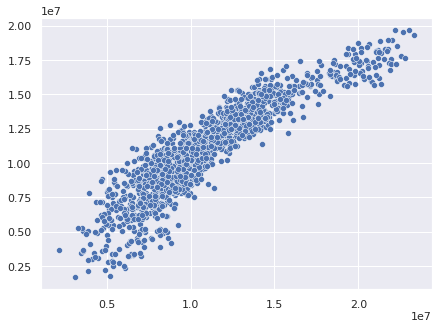

<Figure size 720x432 with 0 Axes>

In [416]:
sns.scatterplot(x=y_test, y=y_pred, data=df2)
plt.figure(figsize=(10,6))
plt.show()

In [417]:
from sklearn import metrics
Linear_Regression_Score="Linear Regression R2-Score : "+str(metrics.r2_score(y_test, y_pred)) # We have a 82 percentage accuracy in this Model.
print(Linear_Regression_Score)

Linear Regression R2-Score : 0.8228624106321987


**Decision Tree**

In [418]:
from sklearn.tree import DecisionTreeRegressor #importing all the required functions

In [419]:
# Instantiate dt
dt = DecisionTreeRegressor()
# Fit dt to the training set
dt.fit(X_train_scaled,y_train)
y_pred_dt=dt.predict(X_test_scaled)
print(y_test,y_pred_dt)

[18543840  7049500  7660600 ...  6505500  9396600  9225240] [18515080.  8061375.  5976650. ...  6507250.  9758600.  9367960.]


In [420]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
df3

,Actual,Predicted
0,18543840,18515080.0
1,7049500,8061375.0
2,7660600,5976650.0
3,14090500,14156220.0
4,6576375,6799000.0
...,...,...
1417,9184130,9346520.0
1418,16686780,15754040.0
1419,6505500,6507250.0
1420,9396600,9758600.0


In [423]:
from sklearn import metrics
DecisionTree_Score="Decision Tree R2-Score :"+str(metrics.r2_score(y_test, y_pred_dt))
print(DecisionTree_Score)

Decision Tree R2-Score :0.9459865056421539


In [425]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 5, n_estimators = 100)
model.fit(X_train_scaled, y_train)
y_pred_rf=model.predict(X_test_scaled)
print(y_test,y_pred_rf)

[18543840  7049500  7660600 ...  6505500  9396600  9225240] [17479707.2221235   7533999.148345    7606018.8903113  ...
  6130004.42892509  9151649.95119031 11067833.33838124]


In [426]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
df4

,Actual,Predicted
0,18543840,1.747971e+07
1,7049500,7.533999e+06
2,7660600,7.606019e+06
3,14090500,1.144912e+07
4,6576375,5.646623e+06
...,...,...
1417,9184130,8.709517e+06
1418,16686780,1.829720e+07
1419,6505500,6.130004e+06
1420,9396600,9.151650e+06


In [430]:
from sklearn import metrics
Randon_Forest_Score="Random Forest R2-Score :"+str(metrics.r2_score(y_test, y_pred_rf))
print(Randon_Forest_Score)

Random Forest R2-Score :0.9010962030297012


In [431]:
from sklearn.ensemble import GradientBoostingRegressor
for kr in [0.01,0.05,0.1,0.3,0.5,0.8,1]:
  model2= GradientBoostingRegressor(learning_rate=kr)
  model2.fit(X_train_scaled, y_train)
  print("Learning rate : ", kr, " Train score : ", model2.score(X_train_scaled,y_train), " Test score : ", model2.score(X_test_scaled,y_test))

Learning rate :  0.01  Train score :  0.6800861462103767  Test score :  0.6770006961483386
Learning rate :  0.05  Train score :  0.9557150181366637  Test score :  0.9533688537752777
Learning rate :  0.1  Train score :  0.9785648912133236  Test score :  0.9765890298099336
Learning rate :  0.3  Train score :  0.9851849168888831  Test score :  0.9824491598449672
Learning rate :  0.5  Train score :  0.9859849109131399  Test score :  0.9800860686159019
Learning rate :  0.8  Train score :  0.9862168637322115  Test score :  0.9772285774390699
Learning rate :  1  Train score :  0.9857049141101981  Test score :  0.9737076920812309


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for sr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model3 = xgb.XGBRegressor(learning_rate = sr, n_estimators=100, verbosity = 0) # initialise the model
  model3.fit(X_train_scaled,y_train) #train the model
  model3.score(X_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", sr, " Train score : ", model3.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model3, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.44690435429197395  Cross-Val score :  -0.45391710915523975
Learning rate :  0.02  Train score :  0.7018412212809806  Cross-Val score :  0.6968185523079896
Learning rate :  0.03  Train score :  0.8952061655233154  Cross-Val score :  0.8908088510879937
Learning rate :  0.04  Train score :  0.9414968270487832  Cross-Val score :  0.9376996475626651
Learning rate :  0.05  Train score :  0.9595632735792691  Cross-Val score :  0.9566963646774939
Learning rate :  0.1  Train score :  0.988238200063669  Cross-Val score :  0.9859993886097506
Learning rate :  0.11  Train score :  0.9903064052861629  Cross-Val score :  0.9880812419466901
Learning rate :  0.12  Train score :  0.9917590362237699  Cross-Val score :  0.9892219414417859
Learning rate :  0.13  Train score :  0.9923206015821471  Cross-Val score :  0.9906729232506155
Learning rate :  0.14  Train score :  0.99329614378679  Cross-Val score :  0.9916824001500555
Learning rate :  0.15  Train score :  0.

#**Comparing Model Scores**

**Linear Regression R2-Score : 82%**

**Decision Tree R2-Score : 95%**

**Random Forest R2-Score :90%**

**GradientBoostingRegressor R2-Score : 98%**

**xgboost R2-Score: 99%**

Out of the above Models, we can observe that Xgboost model has produced the closest to the target variable.

So we can suggest this Model to predict future datasets.

Upon analysing the data, we found that 

1. Squarefeet measure

2. Number of Rooms

3. Number of bedrooms

4. Area of the property

5. Zone of the property 

6. Utilities available

are the key features that contribute for the model accuracy.

We all know that due to the Ukraine - Russia War situation and the Covid Pandemic continues to affect operations Across the Globe, Our Inflation levels has too been affected by 8 year low of 7.79%.

In Such situations, there would be Job Loss, visible Reduction in Monetary roation acorss Country,this would create a donwward trend in terms of Property Sales in the coming periods if situation continues.

To Fight this, the RBI has Increased the Repo rates by 40 points and is now at 4.40%

Based on the data only, the Properties values are starting from 21.5 lakhs and goes all the way upto 2.3 Crores.

But if we add all the Inflation points to the calculations, the Prices are expected to increase along side. Thus, we would recommend the consumers to put a hold for now on the purchasing ideas, we can request them to observe this Hypothetical situation and take a Decision.

In [454]:
min=df['SALES_PRICE'].min() #Minimum price

In [455]:
df['SALES_PRICE'].max() #Maximum Price

23667340

Articles Supporting our prediction on Price Rise

https://economictimes.indiatimes.com/industry/services/property-/-cstruction/residential-property-prices-go-up-in-south-india/articleshow/91575692.cms

https://www.moneycontrol.com/news/business/real-estate/repo-rate-hike-along-with-cost-push-inflation-in-construction-likely-to-slow-down-housing-markets-growth-experts-8452431.html


https://www.financialexpress.com/money/monetary-policy-impact-on-india-inc-and-real-estate-sector/2537344/